In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

C:\Users\robin\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
df = pd.read_csv('admissions_data.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


- Serial No.: Index of each row (1-500)
- GRE Score: GRE test score (out of 340)
- TOEFL Score: TOEFL test score (out of 120)
- University Rating: Evaluated university rating (out of 5)
- SOP: Statement of Purpose Strength (out of 5)
- LOR: Letter of Recommendation Strength (out of 5)
- CGPA: Undergraduate GPA (out of 10)
- Research: Has research experience (either 0 or 1)
- Chance of Admit: Applicant’s chance of being admitted (ranging from 0 to 1)

In [5]:
df.shape

(500, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
features = df.iloc[:,:-1]
labels = df.iloc[:,-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size =0.2, random_state=1)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# print(X_train.mean(axis=0))  # ~0
# print(X_train.std(axis=0))   # ~1


[ 6.66133815e-18  5.77315973e-16 -1.77635684e-16 -1.33226763e-17
  5.32907052e-17 -4.44089210e-18 -1.60760294e-15 -1.11022302e-17]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
X_train.shape

(400, 8)

In [19]:
def build_model(input_dim):
    model = Sequential([
        layers.Input(shape=(input_dim,)), 
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model

In [20]:
input_dim = X_train.shape[1]
model = build_model(input_dim)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
es = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    patience=10, 
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=4,
    callbacks=[es],
    verbose=1
)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mae: 0.0665 - val_loss: 0.0117 - val_mae: 0.0823
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mae: 0.0658 - val_loss: 0.0110 - val_mae: 0.0773
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mae: 0.0631 - val_loss: 0.0107 - val_mae: 0.0778
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0062 - mae: 0.0611 - val_loss: 0.0106 - val_mae: 0.0776
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mae: 0.0600 - val_loss: 0.0108 - val_mae: 0.0797
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0058 - mae: 0.0594 - val_loss: 0.0099 - val_mae: 0.0743
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0056 - mae: 0.0584 - val_loss: 0.0101 - val_mae: 0.0757
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0053 - mae: 0.0577 - val_loss: 0.0100 - val_mae: 0.0738
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.005

In [31]:
val_mse, val_mae = model.evaluate(X_test, y_test, verbose=0)
print("Test MAE:", val_mae)

Test MAE: 0.04932323470711708


In [32]:
print("Test MSE:", val_mse)

Test MSE: 0.004712924361228943


In [33]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred) 
r2

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


0.7559461387329757

### Change of batch size from 32 to 4:

| Metric | Before (batch_size=32) | Now (batch_size=4) |
|--------|------------------------|------------------|
| MAE    | ~0.21                  | 0.049            |
| MSE    | ~0.04                  | 0.0047           |
| R²     | 0.515                  | 0.756            |


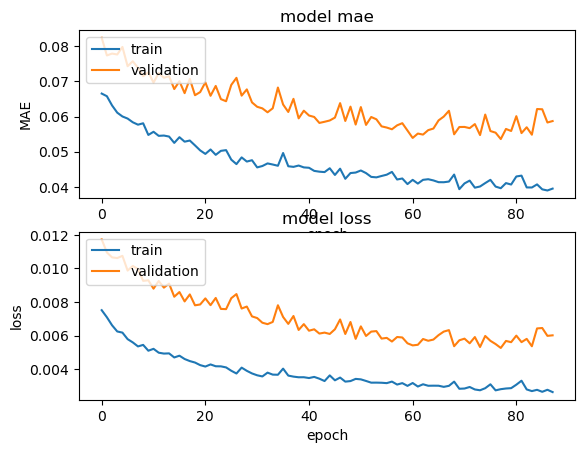

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')


ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()